In [5]:
import os
import random
import cv2
import matplotlib.pyplot as plt


In [14]:
# Paths
train_image_dir = r'../data/train/images'
train_label_dir = r'../data/train/labels'

valid_image_dir = r'../data/valid/images'
valid_label_dir = r'../data/valid/labels'

test_image_dir = r'../data/test/images'
test_label_dir = r'../data/test/labels'


In [25]:
def load_image_and_boxes(image_path, label_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    h, w, _ = image.shape
    
    boxes = []
    if os.path.exists(label_path):
        with open(label_path, 'r') as f:
            for line in f.readlines():
                parts = line.strip().split()
                if len(parts) == 5:
                    cls, x_center, y_center, width, height = map(float, parts)
                    
                    # Check if values are valid
                    if width == 0 or height == 0:
                        continue
                    
                    # Convert to pixel values
                    x_center *= w
                    y_center *= h
                    width *= w
                    height *= h
                    
                    x1 = int(x_center - width / 2)
                    y1 = int(y_center - height / 2)
                    x2 = int(x_center + width / 2)
                    y2 = int(y_center + height / 2)
                    
                    boxes.append([x1, y1, x2, y2, int(cls)])
    return image, boxes


In [26]:
def plot_multiple_images(image_list, boxes_list, num_images=6):
    plt.figure(figsize=(15, 10))
    for i in range(num_images):
        plt.subplot(2, 3, i+1)
        image = image_list[i]
        boxes = boxes_list[i]
        
        plt.imshow(image)
        for box in boxes:
            x1, y1, x2, y2, cls = box
            plt.gca().add_patch(plt.Rectangle((x1, y1), x2-x1, y2-y1, 
                                              edgecolor='red', facecolor='none', linewidth=2))
            plt.text(x1, y1 - 5, str(cls), color='red', fontsize=8)
        plt.axis('off')
    plt.tight_layout()
    plt.show()


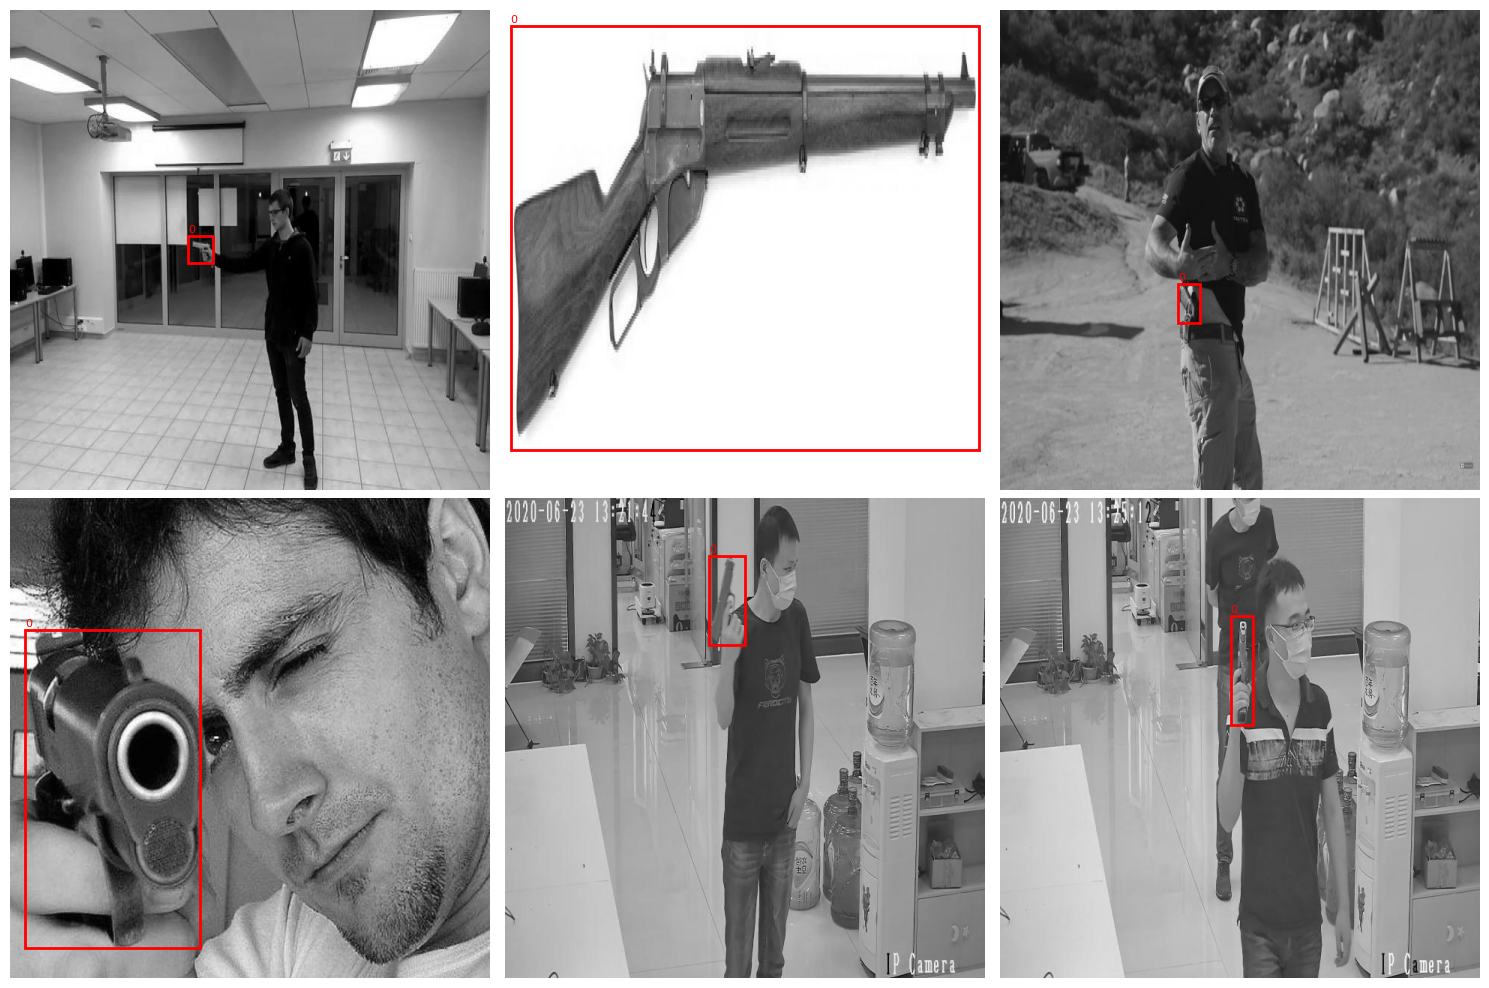

In [40]:
# List all images
all_train_images = os.listdir(train_image_dir)

# Pick 6 random images
random_images = random.sample(all_train_images, 6)

# Load images and boxes
images = []
boxes = []

for img_name in random_images:
    img_path = os.path.join(train_image_dir, img_name)
    label_name = os.path.splitext(img_name)[0] + '.txt'
    label_path = os.path.join(train_label_dir, label_name)
    
    image, box = load_image_and_boxes(img_path, label_path)
    
    images.append(image)
    boxes.append(box)

# Plot
plot_multiple_images(images, boxes)
